In [1]:
import csv
import pandas as pd
import numpy as np
import plotnine
from plotnine import *
from plotnine.data import *
import matplotlib.style as style
import seaborn as sns
style.use('seaborn-poster')
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv('RefRunToM.csv',sep=',', skiprows=6, error_bad_lines=False)

In [3]:
Data2 = pd.read_csv('CarFun100.csv',sep=',', skiprows=6, error_bad_lines=False)

In [4]:
Data.rename(columns={'[run number]':'run', '[step]' : 'tick', '[name] of student 7' : 'name' ,
                     '[plot_belief] of student 7' : 'belief' , 'mean_TotalTickChangeBel' : 'MeanBeliefChange',
                     'AllStudents_TotalTickChangeBel':'TotalBeliefChange',
                    'PercInfluenced': 'ShareInfluenced', 'SocialGroupSA' : 'SizeRefGroup', 'carshare': 'Share of car users',
                    'bikeshare': 'Share of bike users', 'busshare' : 'Share of bus users'},inplace=True)
Data2.rename(columns={'[run number]':'run', '[step]' : 'tick', '[name] of student 7' : 'name' ,
                     '[plot_belief] of student 7' : 'belief' , 'mean_TotalTickChangeBel' : 'MeanBeliefChange',
                     'AllStudents_TotalTickChangeBel':'TotalBeliefChange',
                    'PercInfluenced': 'ShareInfluenced', 'SocialGroupSA' : 'SizeRefGroup', 'carshare': 'Share of car users',
                    'bikeshare': 'Share of bike users', 'busshare' : 'Share of bus users'},inplace=True)


In [5]:
Data['Share of car users'] = Data['Share of car users'].apply(lambda x : x / 20)
Data['Share of bus users'] = Data['Share of bus users'].apply(lambda x : x / 20)
Data['Share of bike users'] = Data['Share of bike users'].apply(lambda x : x / 20)

In [10]:
ModeShare = pd.read_csv('Carpool.csv',sep=',', skiprows=6, error_bad_lines=False)

In [7]:
ModeShare.rename(columns={'[run number]':'run', '[step]' : 'tick', '[name] of student 7' : 'name' ,
                     '[plot_belief] of student 7' : 'belief' , 'mean_TotalTickChangeBel' : 'MeanBeliefChange',
                     'AllStudents_TotalTickChangeBel':'TotalBeliefChange',
                    'PercInfluenced': 'ShareInfluenced', 'SocialGroupSA' : 'SizeRefGroup', 'carshare': 'Share of car users',
                    'bikeshare': 'Share of bike users', 'busshare' : 'Share of bus users', 
                          'count students with [carsfull-impossible = true]' : 'RejectedCarpoolers'},inplace=True)


In [8]:
ModeShare10 = ModeShare[ModeShare.PercCar == 10]

In [9]:
ModeShare20 = ModeShare[ModeShare.PercCar == 20]

In [10]:
ModeShare30 = ModeShare[ModeShare.PercCar == 30]

In [11]:
#Subsetting dataset to datasets with only certain value-mode combinations (for the heat map later in this script)
Rel = Data[Data.Inspect_Variable == "Relaxation"]
Eff = Data[Data.Inspect_Variable == "Efficiency"]
Flex = Data[Data.Inspect_Variable == "Flexibility"]
Env = Data[Data.Inspect_Variable == "Environment"]
Fun = Data[Data.Inspect_Variable == "Fun"]
Safety = Data[Data.Inspect_Variable == "Safety"]
Comf = Data[Data.Inspect_Variable == "Comfort"]


CarRel1 = Rel[Rel.Inspect_Transportmode == "Car"]
CarEff1 = Eff[Eff.Inspect_Transportmode == "Car"]
CarFlex1 = Flex[Flex.Inspect_Transportmode == "Car"]
CarEnv1 = Env[Env.Inspect_Transportmode == "Car"]
CarFun1 = Fun[Fun.Inspect_Transportmode == "Car"]
CarSafety1 = Safety[Safety.Inspect_Transportmode == "Car"]
CarComf1 = Comf[Comf.Inspect_Transportmode == "Car"]

BikeRel1 = Rel[Rel.Inspect_Transportmode == "Bike"]
BikeEff1 = Eff[Eff.Inspect_Transportmode == "Bike"]
BikeFlex1 = Flex[Flex.Inspect_Transportmode == "Bike"]
BikeEnv1 = Env[Env.Inspect_Transportmode == "Bike"]
BikeFun1 = Fun[Fun.Inspect_Transportmode == "Bike"]
BikeSafety1 = Safety[Safety.Inspect_Transportmode == "Bike"]
BikeComf1 = Comf[Comf.Inspect_Transportmode == "Bike"]

BusRel1 = Rel[Rel.Inspect_Transportmode == "Bus"]
BusEff1 = Eff[Eff.Inspect_Transportmode == "Bus"]
BusFlex1 = Flex[Flex.Inspect_Transportmode == "Bus"]
BusEnv1 = Env[Env.Inspect_Transportmode == "Bus"]
BusFun1 = Fun[Fun.Inspect_Transportmode == "Bus"]
BusSafety1 = Safety[Safety.Inspect_Transportmode == "Bus"]
BusComf1 = Comf[Comf.Inspect_Transportmode == "Bus"]

In [225]:
# The standard deviations of variables
StandardDeviations = Data.std()
StandardDeviations = StandardDeviations[10:19]
StandardDeviations

tick                   433.590025
belief                   3.094926
ShareInfluenced         11.412543
SizeRefGroup             0.285802
Share of car users       0.187582
Share of bike users      0.113823
Share of bus users       0.108878
MeanBeliefChange         0.013236
zero                     2.525018
dtype: float64

### Making a dataframe with average values over all runs

In [264]:
Data =ModeShare10.sort_values('tick')
NumTicks = np.arange(0, 1502)

Average10 = pd.DataFrame(columns= ['Tick', 'MeanBelief','MeanStud', 'MeanBeliefShift', 'MeanBus', 'MeanBike', 'MeanCar', 'CountStud'])
Tick = []
MeanBelief = []
MeanStud = []
MeanBeliefShift = []
MeanBus = []
MeanBike = []
MeanCar = []


for i in NumTicks:
    low = (i-1)*100
    high = i *100
    Now = Data[low:high]
    meanbelief = Now['belief'].mean(axis=0)
    meanstud = Now['SizeRefGroup'].mean(axis=0)
    meanbeliefshift = Now['MeanBeliefChange'].mean(axis=0)
    meanbus = Now['Share of bus users'].mean(axis=0)
    meanbike = Now['Share of bike users'].mean(axis=0)
    meancar = Now['Share of car users'].mean(axis=0)
    
    
    Tick.append(i)
    MeanBelief.append(meanbelief)
    MeanStud.append(meanstud)
    MeanBeliefShift.append(meanbeliefshift)
    MeanBus.append(meanbus)
    MeanBike.append(meanbike)
    MeanCar.append(meancar)
    
    
    
Average10.Tick = Tick
Average10.MeanBelief = MeanBelief
Average10.MeanStud = MeanStud
Average10.MeanBeliefShift = MeanBeliefShift
Average10.MeanBus = MeanBus
Average10.MeanBike = MeanBike
Average10.MeanCar = MeanCar

In [6]:
def labels(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).apply(lambda x: '{:,}'.format(x)).tolist()
def breaks(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).tolist()


In [7]:
#Determining plot themes
theme_set(
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45))
    )
plotnine.themes.element_line (size = 0.001)
plotnine.themes.themeable.panel_spacing_x(5)

### The share of socially influenced students

In [85]:
InfluencesHist = (ggplot(Data.dropna(subset=['ShareInfluenced'])) 
       + geom_histogram(
           aes(x='ShareInfluenced'),
                        color = 'grey', size=2
                       
           ) +
    labs(
        title ='Influenced population',
        x = 'Share of influenced students',
         y = 'Count',
    ) 
      + 
    geom_vline(aes(xintercept = Data.ShareInfluenced.mean()), linetype = 'dashed',  color = 'green'))

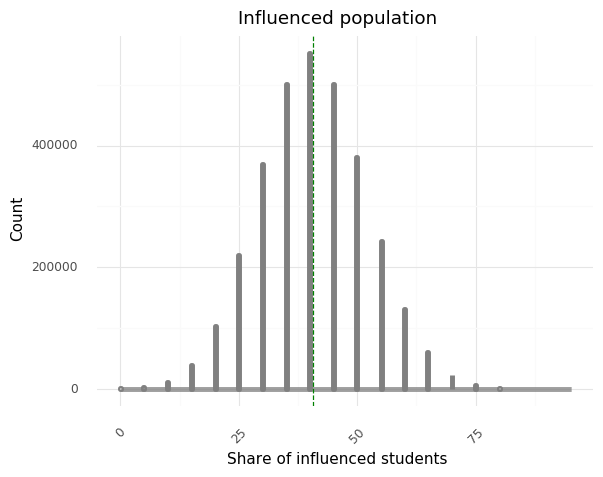

<ggplot: (362915620)>

In [86]:
InfluencesHist

### Belief change per evaluation moment

In [80]:
figchangebeliefs = (
    ggplot(Average ) 
    +
    stat_smooth(aes(x='Tick', y='MeanBeliefShift'), method ='loess')
    +
    labs(
        title ='Change in beliefs',
        x = 'tick',
         y = 'Relative change in beliefs') )

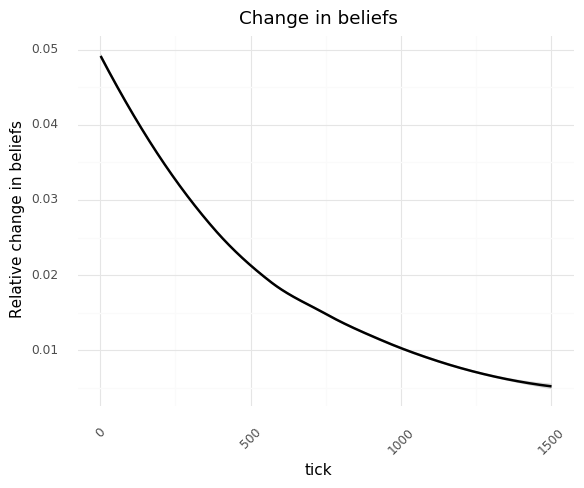

<ggplot: (-9223372036580980399)>

In [81]:
figchangebeliefs

### Opinion space

In [82]:
Flexbeliefs = Data[Data.Inspect_Variable == 'Comfort']
ComfCarbeliefs = Flexbeliefs[Flexbeliefs.Inspect_Transportmode == 'Car']

Envbeliefs = Data[Data.Inspect_Variable == 'Environment']
EnvBusBeliefs = Envbeliefs[Envbeliefs.Inspect_Transportmode == 'Bus']

In [8]:
#Opinion dynamics for all mode-value combinations

OpinionSpace =(ggplot(aes(x = 'tick', y='belief', group='run', color='name')) 
         +
  geom_line(data=Data, size=0.5, alpha = 0.2) 
         +
    labs(
        title ='Opinion space',
        x = 'ticks',
         y = 'Degree of belief',
    ) +
    scale_x_continuous(
        limits = (0, 1500),
        labels = labels(0, 1500, 500),
        breaks = breaks(0, 1500, 500)
    ) +
    scale_y_continuous(
        limits = (0, 12),
        labels = labels(0, 10, 5),
        breaks = breaks(0, 10, 5)
   ) + 
    facet_grid(['Inspect_Variable', 'Inspect_Transportmode'])+
    #    theme(strip_text_y = element_text(angle =-45))+
         theme(figure_size=(11, 8) ))


 
    

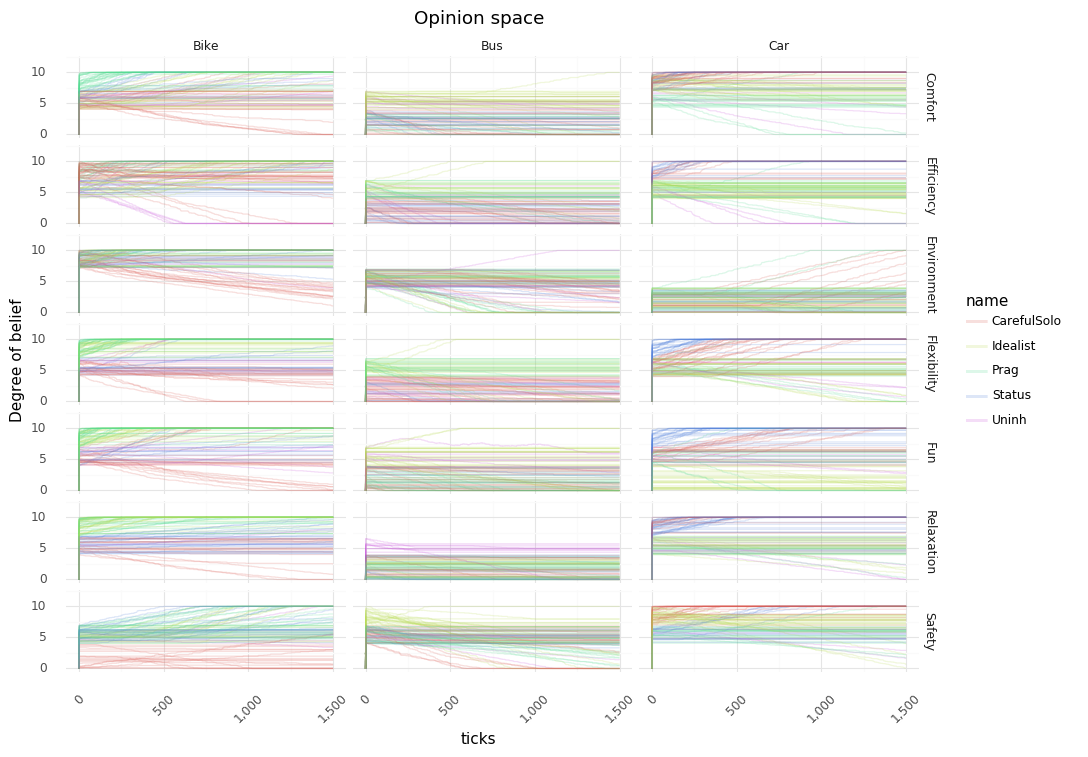

<ggplot: (-9223372036564955918)>

In [9]:
OpinionSpace

#### Opinion dynamics for the car-flexibility combination


In [90]:
FunCarbeliefs =(ggplot(aes(x = 'tick', y='belief', group='run', color='name')) 
         +
  geom_line(data=CarFun1, size=0.5, alpha = 0.43) 
         +
    labs(
        title ='Opinion space',
        x = 'ticks',
         y = 'Degree of belief',
    ) +
    scale_x_continuous(
        limits = (0, 1500),
        labels = labels(0, 1500, 500),
        breaks = breaks(0, 1500, 500)
    ) +
    scale_y_continuous(
        limits = (0, 12),
        labels = labels(0, 10, 5),
        breaks = breaks(0, 10, 5)
   ) )

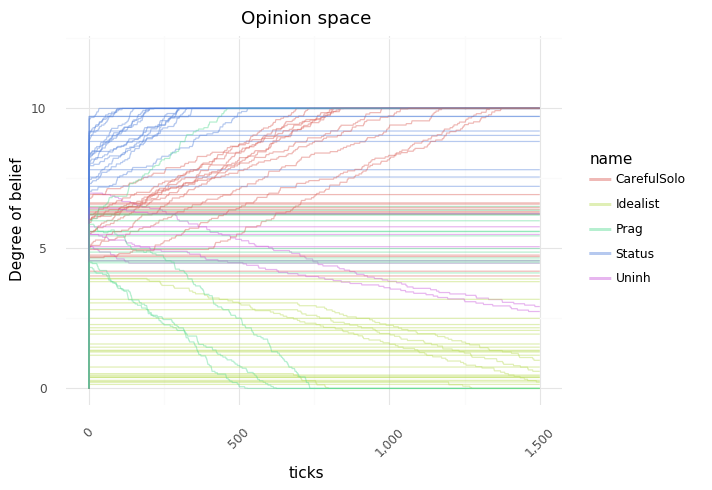

<ggplot: (-9223372036398517837)>

In [91]:
FunCarbeliefs

#### Opinion dynamics for the bus-environment combination


In [14]:
OpinionSpaceEnvBus =(ggplot(aes(x = 'tick', y='belief', group='run', color='name')) 
         +
  geom_line(data=EnvBusBeliefs, size=0.5, alpha = 0.43) 
         +
    labs(
        title ='Opinion space',
        x = 'ticks',
         y = 'Degree of belief',
    ) +
    scale_x_continuous(
        limits = (0, 1500),
        labels = labels(0, 1500, 500),
        breaks = breaks(0, 1500, 500)
    ) +
    scale_y_continuous(
        limits = (0, 12),
        labels = labels(0, 10, 5),
        breaks = breaks(0, 10, 5)
   ) )

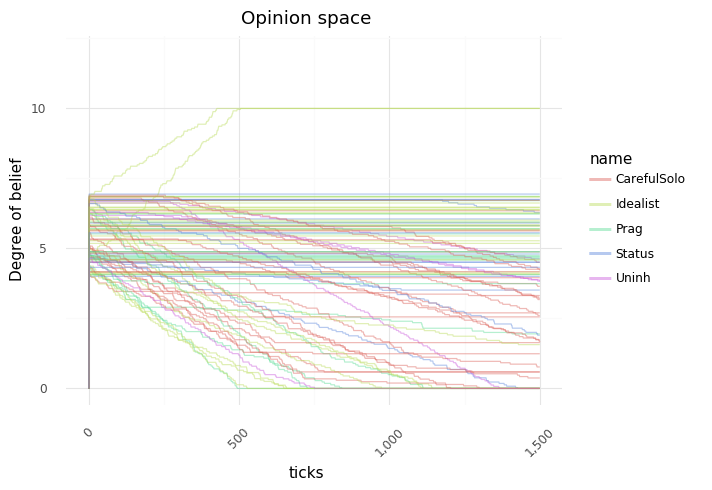

<ggplot: (-9223372036554065320)>

In [156]:
OpinionSpaceEnvBus

### Heat maps

In [36]:
Rel = Data[Data.Inspect_Variable == "Relaxation"]
Eff = Data[Data.Inspect_Variable == "Efficiency"]
Flex = Data[Data.Inspect_Variable == "Flexibility"]
Env = Data[Data.Inspect_Variable == "Environment"]
Fun = Data[Data.Inspect_Variable == "Fun"]
Safety = Data[Data.Inspect_Variable == "Safety"]
Comf = Data[Data.Inspect_Variable == "Comfort"]


In [37]:
CarRel = Rel[Rel.Inspect_Transportmode == "Car"]
CarEff = Eff[Eff.Inspect_Transportmode == "Car"]
CarFlex = Flex[Flex.Inspect_Transportmode == "Car"]
CarEnv = Env[Env.Inspect_Transportmode == "Car"]
CarEff = Eff[Eff.Inspect_Transportmode == "Car"]
CarFun = Fun[Fun.Inspect_Transportmode == "Car"]
CarSafety = Safety[Safety.Inspect_Transportmode == "Car"]
CarComf = Comf[Comf.Inspect_Transportmode == "Car"]

BikeRel = Rel[Rel.Inspect_Transportmode == "Bike"]
BikeEff = Eff[Eff.Inspect_Transportmode == "Bike"]
BikeFlex = Flex[Flex.Inspect_Transportmode == "Bike"]
BikeEnv = Env[Env.Inspect_Transportmode == "Bike"]
BikeEff = Eff[Eff.Inspect_Transportmode == "Bike"]
BikeFun = Fun[Fun.Inspect_Transportmode == "Bike"]
BikeSafety = Safety[Safety.Inspect_Transportmode == "Bike"]
BikeComf = Comf[Comf.Inspect_Transportmode == "Bike"]

BusRel = Rel[Rel.Inspect_Transportmode == "Bus"]
BusEff = Eff[Eff.Inspect_Transportmode == "Bus"]
BusFlex = Flex[Flex.Inspect_Transportmode == "Bus"]
BusEnv = Env[Env.Inspect_Transportmode == "Bus"]
BusEff = Eff[Eff.Inspect_Transportmode == "Bus"]
BusFun = Fun[Fun.Inspect_Transportmode == "Bus"]
BusSafety = Safety[Safety.Inspect_Transportmode == "Bus"]
BusComf = Comf[Comf.Inspect_Transportmode == "Bus"]

In [228]:
Sorted = Data2.sort_values('tick')

NumTicks = np.arange(0, 1502)

Average = pd.DataFrame(columns= ['Tick', 'Belief', 'Students', 'Mode', 'Value'])
Tick = []
Belief = []
NumStuds = []  
Mode = []
Value = []


for i in NumTicks:
    low = (i-1)*100
    high = i *100
    Now = Sorted[low:high]
    zero = Now['zero'].mean(axis=0)
    one = Now['one'].mean(axis=0)
    two = Now['two'].mean(axis=0)
    three = Now['three'].mean(axis=0)
    four = Now['four'].mean(axis=0)
    five = Now['five'].mean(axis=0)
    six = Now['six'].mean(axis=0)
    seven = Now['seven'].mean(axis=0)
    eight = Now['eight'].mean(axis=0)
    nine = Now['nine'].mean(axis=0)

    
    Tick.append(i)
    Belief.append(0)
    NumStuds.append(zero)    

    Tick.append(i)
    Belief.append(1)
    NumStuds.append(one)
    
    Tick.append(i)
    Belief.append(2)
    NumStuds.append(two)
    
    Tick.append(i)
    Belief.append(3)
    NumStuds.append(three)   
   
    Tick.append(i)
    Belief.append(4)
    NumStuds.append(four)
    
    Tick.append(i)
    Belief.append(5)
    NumStuds.append(five)
    
    Tick.append(i)
    Belief.append(6)
    NumStuds.append(six)
    
    Tick.append(i)
    Belief.append(7)
    NumStuds.append(seven)
   
    Tick.append(i)
    Belief.append(8)
    NumStuds.append(eight)
   
    Tick.append(i)
    Belief.append(9)
    NumStuds.append(nine)
    


                    
Average.Tick = Tick
Average.Belief = Belief
Average.Students = NumStuds

In [229]:
Average = Average.query('Tick == 0| Tick == 100 |Tick == 200 | Tick == 300 |Tick == 400| Tick == 500 | Tick == 600| Tick == 700 | Tick == 800| Tick == 900| Tick == 1000| Tick == 1100| Tick == 1200| Tick == 1300| Tick == 1400| Tick == 1500')       



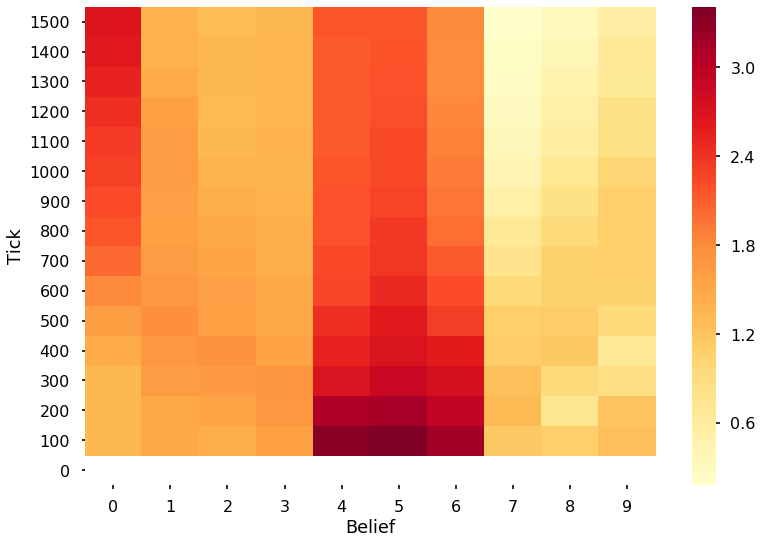

In [230]:
Data2 = Average.pivot("Tick", "Belief", "Students")
ax = sns.heatmap(Data2, cmap="YlOrRd")
ax.invert_yaxis()
plt.savefig('CarFunToM.jpg')
plt.show()

In [218]:
ModeShares =(ggplot(Average, aes(x = 'Tick'))
         +
                  geom_line( aes(y = 'MeanCar'), color='blue') 
         +
                  geom_line( aes(y = 'MeanBike'), color='green') 
         +MeanCar
                  geom_line( aes(y = 'MeanBus'), color='yellow') 
         +
    labs(
        title ='Mode choices',
        x = 'ticks',
         y = 'Mode share',
        
        figsize = 3
   ) )

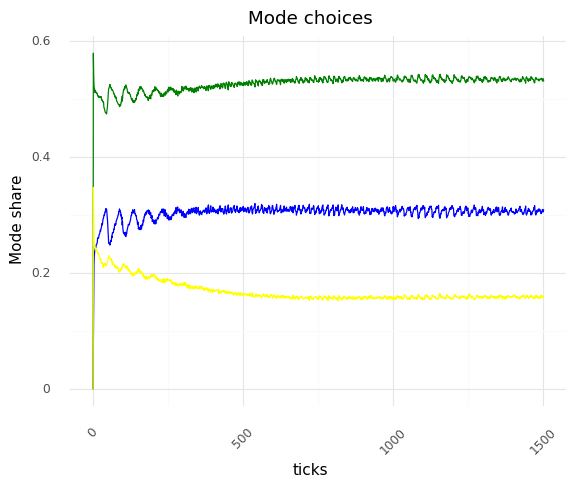

<ggplot: (-9223372036560624622)>

In [220]:
ModeShares

### save as PNG's


In [173]:
InfluencesHist.save(filename = 'HistInfluencedToM.png', height=7, width=10, units = 'in', dpi=1000)

In [174]:
figchangebeliefs.save(filename = 'ChangeBeliefsToM.png', height=7, width=10, units = 'in', dpi=1000)

In [16]:
OpinionSpace.save(filename = 'OpinionSpaceToM.png', height=7, width=10, units = 'in', dpi=1000)

In [221]:
FunCarbeliefs.save(filename = 'OpinionSpaceComfCarbeliefsToM.png', height=7, width=10, units = 'in', dpi=1000)

In [223]:
ModeShares.save(filename = 'ModeSharesToM.png', height=7, width=10, units = 'in', dpi=1000)